In [1]:
# MonStim_CSV_Analysis - main.py
from monstim_to_pickle import pickle_data
import Analyze_EMG

DATA_PATH = 'files_to_analyze'
OUTPUT_PATH = 'output'


### Things to work on:
    # URGENT: add reflex curves leative to Mmax (requires Mmax to be calculated first).
    # 1) More functions for dataset analysis:
        # each session should bring in and reference it's own parameters like scan rate, m/h-start/end, 
    # 2) Save session/dataset class objects for quicker reloading?
    # 4) Add function to EMGSession class: area under the curve for reflexes
    # 5) Add function to EMGSession class: frequency/power analysis for tremor, noise, or movement.
    # 7) Add a GUI for easier use.

In [2]:
#Process CSVs into Pickle files: 'files_to_analyze' --> 'output'
# pickle_data(DATA_PATH, OUTPUT_PATH)

# Create dictionaries of Pickle datasets and single sessions that are in the 'output' directory.
dataset_dict, datasets = Analyze_EMG.unpackPickleOutput(OUTPUT_PATH)
for idx, dataset in enumerate(datasets):
    print(f'dataset index {idx}: {dataset}')

dataset index 0: 240523 C230.5 post-dec early1 sciatic mcurve
dataset index 1: 240523 C230.5 post-dec sciatic mcurve
dataset index 2: 240523 C230.5 post-dec sciatic mcurve long stim
dataset index 3: 240523 C230.5 post-dec sciatic mcurve2
dataset index 4: 240523 C230.5 pre-dec sciatic mcurve
dataset index 5: 240524 C230.2 post-dec sciatic mcurve long other leg
dataset index 6: 240524 C230.2 post-dec sciatic mcurve short other leg
dataset index 7: 240524 C230.2 post-dec sciatic mcurve std
dataset index 8: 240524 C230.2 post-dec sciatic mcurve std other leg
dataset index 9: 240524 C230.2 pre-dec sciatic mcurve long
dataset index 10: 240524 C230.2 pre-dec sciatic mcurve std
dataset index 11: old versions


In [3]:
# Define dataset of interest for downstream analysis.
dataset_idx = 2
dataset_oi = Analyze_EMG.dataset_oi(dataset_dict, datasets, dataset_idx)
dataset_oi.dataset_parameters()

# EMG Sessions: 5


Session Name: C223
# of Channels: 2
Scan rate (Hz): 100000
Samples/Channel: 110100
Stimulus delay (ms): 1.0
Stimulus duration (ms): 1.0
Stimulus interval (s): 5.0
EMG amp gains: [500, 1000, 500, 500, 500, 500]


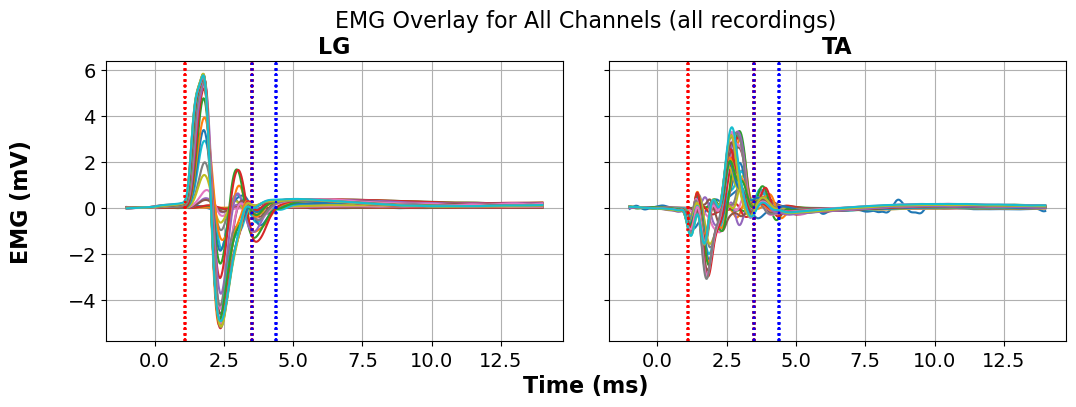

In [4]:
# Define session of interest for downstream analysis.
session_idx = 2
session_oi = Analyze_EMG.session_oi(dataset_dict, datasets, dataset_idx, session_idx)
session_oi.session_parameters()

# Visualize single EMG session raw and filtered
channel_names = ["LG", "TA"]
# channel_names = ["LG"]

# session_oi.plot_emg(channel_names=channel_names, m_flags=True, h_flags=True, data_type='raw')
session_oi.plot_emg(channel_names=channel_names, m_flags=True, h_flags=True, data_type='filtered')
# session_oi.plot_emg(channel_names=channel_names, m_flags=True, h_flags=True, data_type='rectified')
# session_oi.plot_emg(channel_names=channel_names, m_flags=True, h_flags=True, data_type='rectified_filtered')

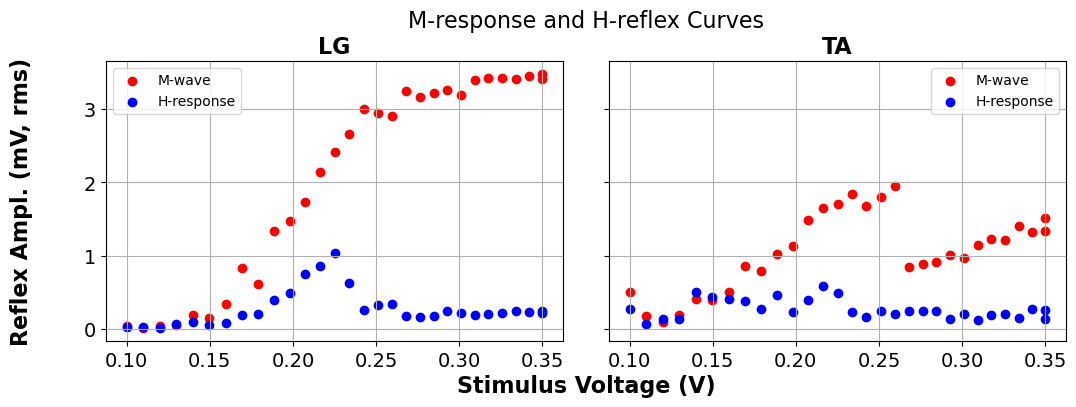

Plateau region detected with window size 14. Threshold: 0.2 times SD.
	M-max amplitude: 3.2455311380578955
Plateau region detected with window size 11. Threshold: 0.2 times SD.
	M-max amplitude: 1.1131729087940108


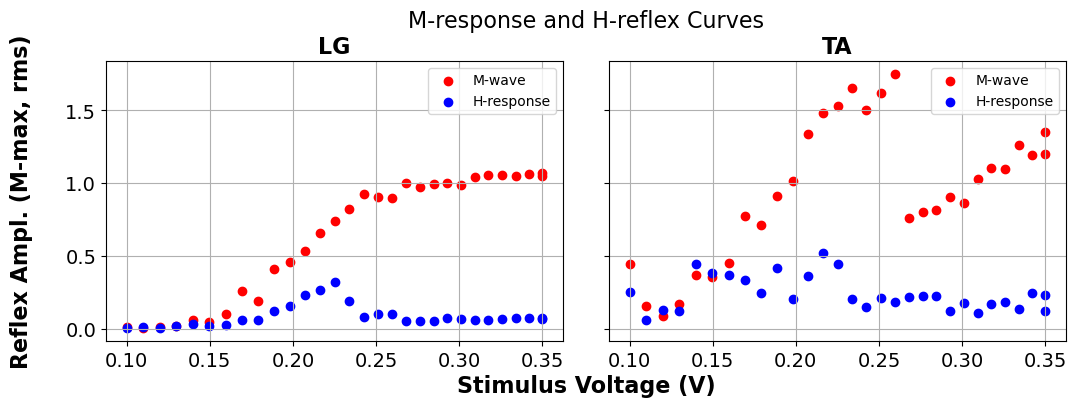

In [5]:
# Inspect reflex curves and suspected H-reflex trials
# session_oi.plot_emg_suspectedH(channel_names=channel_names, h_threshold=.7)
session_oi.plot_reflex_curves(channel_names=channel_names, method='rms')
session_oi.plot_reflex_curves(channel_names=channel_names, method='rms', relative_to_mmax=True)

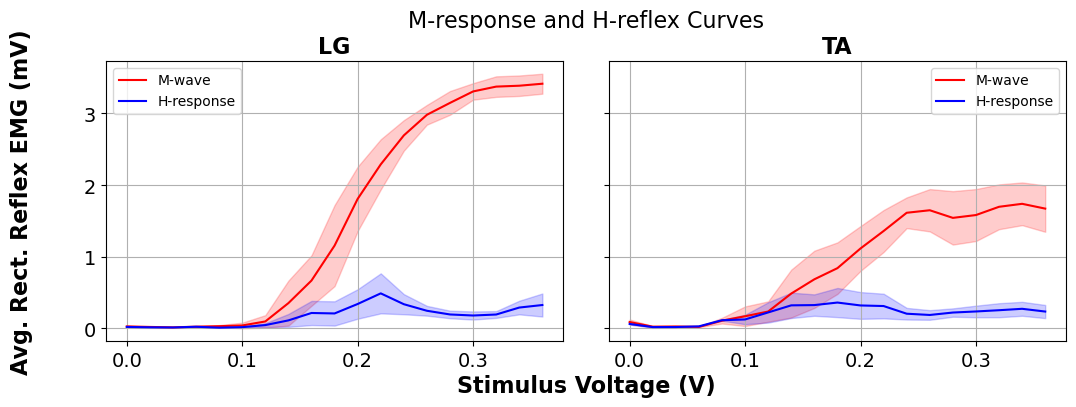

Plateau region detected with window size 5. Threshold: 0.2 times SD.
	M-max amplitude: 3.2396435298037076
Plateau region detected with window size 8. Threshold: 0.2 times SD.
	M-max amplitude: 1.5362122601747985


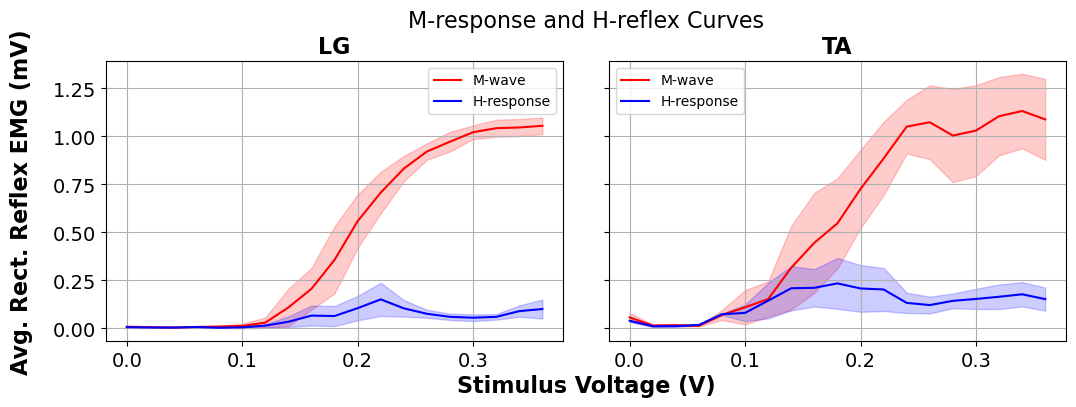

In [9]:
dataset_oi.plot_reflex_curves(channel_names=channel_names, method='rms')
dataset_oi.plot_reflex_curves(channel_names=channel_names, method='rms', relative_to_mmax=True)

UnboundLocalError: cannot access local variable 'm_wave_amplitude_max_h' where it is not associated with a value

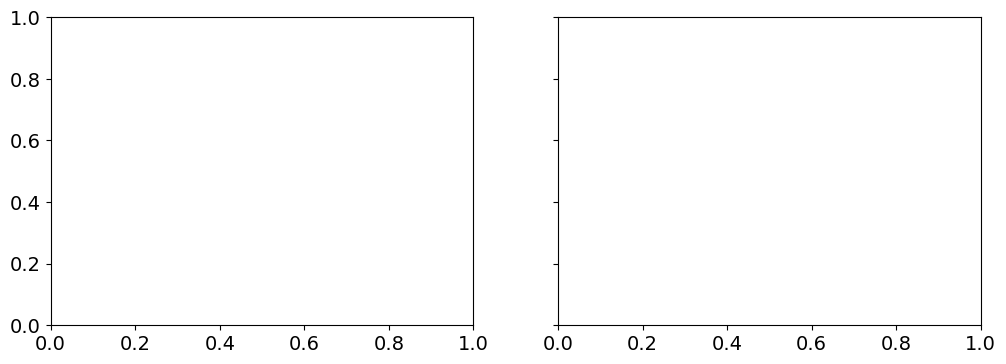

In [12]:
dataset_oi.plot_max_h_reflex(channel_names=channel_names, method='rms', relative_to_mmax=True)